In [1]:
import sympy as sp

### Derivation of $\pi _T$ for a van der Waals gas
A useful formula for $\pi _T$, which is quite general$^*$, is $\pi _T = T\big ( \frac {\partial P}{\partial T} \big )_V - P$. 

$^*$This comes from a set of equations known as *Maxwell's Equations* -- which we'll get to later.

For a vdw gas (as you probably remember), $P=nRT/(V-nb)-n^2a/V^2$. In the cell below, derive an analytical expression for $\pi _T$ for a van der Waals gas. Sympy can help.

In [2]:
### BEGIN SOLUTION
# pi_T for a vdw gas
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/V**2
dPdT = sp.diff(P,T)
pi_T = T*dPdT - P
sp.pprint(pi_T)
print(pi_T)
### END SOLUTION

   2
a⋅n 
────
  2 
 V  
a*n**2/V**2


### Derivation of $\mu _T$ for a van der Waals gas
Our formula for this (which also comes from *Maxwell's Equations*!) is $\mu _T = \frac {P + \pi_T}{(\partial P/\partial V)_T} + V$. To simplify matters, we'll take the bilinear Taylor expansion of the first term. That is, if we say $\frac {P + \pi_T}{(\partial P/\partial V)_T}=F(a,b)$, then

$$
\frac {P + \pi_T}{(\partial P/\partial V)_T} \approx F_{a,b=0} + a\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}  + b\big (\frac{\partial F}{\partial b}\big )|_{a,b=0} 
$$

$^*$This equation, by the way, comes from a set of equations known as *Maxwell's Equations* -- which we'll get to later.

Hopefully, your result from the previous problem was $\pi_T=n^2a/V^2$. In the cell below, derive an analytical expression for $\mu _T$ for a van der Waals gas. Some hints: To find $\big (\frac{\partial F}{\partial a}\big )|_{a,b=0}$, first take the derivative of $F$ with respect to $a$, and *then* substitute zeros for $a$ and $b$. Similarly with $\big (\frac{\partial F}{\partial b}\big )|_{a,b=0}$. Sympy can help.

F =  R*T*n/((V - b*n)*(-R*T*n/(V - b*n)**2 + 2*a*n**2/V**3))
              R⋅T⋅n              
─────────────────────────────────
          ⎛                    2⎞
          ⎜    R⋅T⋅n      2⋅a⋅n ⎟
(V - b⋅n)⋅⎜- ────────── + ──────⎟
          ⎜           2      3  ⎟
          ⎝  (V - b⋅n)      V   ⎠
Exact result for mu_T =
              R⋅T⋅n                  
───────────────────────────────── + V
          ⎛                    2⎞    
          ⎜    R⋅T⋅n      2⋅a⋅n ⎟    
(V - b⋅n)⋅⎜- ────────── + ──────⎟    
          ⎜           2      3  ⎟    
          ⎝  (V - b⋅n)      V   ⎠    
F0= -V
Approximate result for mu_T =
      2⋅a⋅n
b⋅n - ─────
       R⋅T 
b*n - 2*a*n/(R*T)
24.436/((20 - b)*(a/4000 - 24.436/(20 - b)**2))


<IPython.core.display.Javascript object>


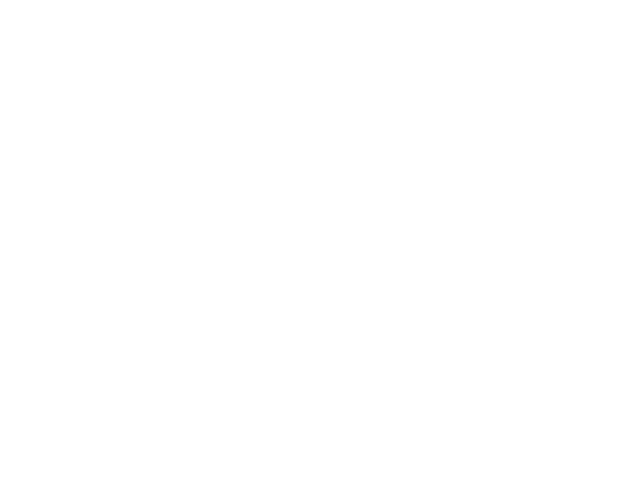

Text(0.5, 0, 'b')

In [3]:
### BEGIN SOLUTION
# mu_T for a vdw gas
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")

P = n*R*T/(V-n*b) - a*n**2/V**2
pi_T = n**2*a/V**2
dPdV = sp.diff(P,V)
F = (P+pi_T)/dPdV
print("F = ", F)
sp.pprint(F)
mu_T_exact = F+V
print('Exact result for mu_T =')
sp.pprint(mu_T_exact)


F0 = F.subs({a:0,b:0}); print("F0=",F0)
Fa = sp.diff(F,a).subs({a:0,b:0})
Fb = sp.diff(F,b).subs({a:0,b:0})
mu_T = F0 + Fa*a + Fb*b + V
print('Approximate result for mu_T =')
sp.pprint(mu_T)
print(mu_T)

# This is not part of the solution, but motivation for the bilinear approach
import PchemLibrary as PL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

agrid, bgrid = PL.Statespace([0,4,21],[0,.5,20])
Ftrial = R*T*n/((V - b*n)*(-R*T*n/(V - b*n)**2 + 2*a*n**2/V**3))
Ftrial = Ftrial.subs({n:1,P:1,V:20,R:.082,T:298}); print(Ftrial)
Fgrid = 24.436/((20 - bgrid)*(agrid/4000 - 24.436/(20 - bgrid)**2))

# Graph it -- if this looks like a plane
%matplotlib notebook
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(agrid, bgrid, Fgrid, color='plum') # Make the mesh plot
ax.set_xlabel("a")
ax.set_ylabel("b")

# So ... F0 = V, which cancels with the other V
# And the graph just made shows that a bilinear appoximation should be pretty accurate

### END SOLUTION

### Getting the intermolecular part of $H(T,P)$ from $\mu_T$ for a van der Waals gas
If we say that 

$$
U(T,V) = [{3 \over 2}RT + f_{rot}(T) + f_{vib}(T) + f_{intermol}(T,V)] \times n
$$ 

then it's a pretty good approximation to say 

$$
H(T,P) = [{5 \over 2}RT + f_{rot}(T) + f_{vib}(T) + f'_{intermol}(T,P)] \times n
$$

where 

$$
f'_{intermol}(T,P) = {1 \over n} \int^P \mu_T dP
$$

(i.e., the indefinite integral of $\mu_T$). In the cell below, derive an expression for $f'_{intermol}(T,P)$. You'll need an expression for $\mu_T$ to do this -- hopefully, you got something like $bn - 2an/(RT)$ in the previous problem. 

Sympy can help on this too, but you might find Sympy's simplify function useful. That is, after you've obtained an expression for $f'_{intermol}$, try this:

    fpintermol = sp.simplify(fpintermol)
    
and then print the result again.

In [4]:
### BEGIN SOLUTION
# f' intermolecular for vdw
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("R")
sp.var("T")
sp.var("P")

mu_T = b*n - 2*a*n/(R*T)

fpintermol = sp.integrate(mu_T,P)/n
fpintermol = sp.simplify(fpintermol)
sp.pprint(fpintermol)
### END SOLUTION

      2⋅P⋅a
P⋅b - ─────
       R⋅T 


### Berthelot's gas
A Berthelot gas is defined by $P=nRT/(V-nb)-n^2a/(TV^2)$. In the three cells below, find Berthelot's expressions for
- $\pi_T$
- $\mu_T$
- $f'_{intermol}(T,P)$

Assuming you're using Sympy for this, you might find useful the "simplify" functionality for each result.

In [5]:
# pi_T
### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/(V**2*T)
dPdT = sp.diff(P,T)
pi_T = T*dPdT - P
print('pi_T =')
print(pi_T)
pi_T = sp.simplify(pi_T)
print(pi_T)
sp.pprint(pi_T)

# This is some kind of test
-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2)
test = sp.simplify(-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2))
print(test)



### END SOLUTION

pi_T =
-R*T*n/(V - b*n) + T*(R*n/(V - b*n) + a*n**2/(T**2*V**2)) + a*n**2/(T*V**2)
2*a*n**2/(T*V**2)
     2
2⋅a⋅n 
──────
    2 
 T⋅V  


In [7]:
# mu_T
### BEGIN SOLUTION


sp.var("a")
sp.var("b")
sp.var("n")
sp.var("V")
sp.var("R")
sp.var("T")
sp.var("x")

P = n*R*T/(V-n*b) - a*n**2/(V**2*T)
pi_T = 2*a*n**2/(T*V**2)
dPdV = sp.diff(P,V)
F = (P+pi_T)/dPdV
mu_T_exact = F+V
print('Exact result for mu_T =')
sp.pprint(mu_T_exact)


F0 = F.subs({a:0,b:0}); print("F0=",F0)
Fa = sp.diff(F,a).subs({a:0,b:0}); print("Fa=",Fa)
Fb = sp.diff(F,b).subs({a:0,b:0}); print("Fb=",Fb)
mu_T = F0 + Fa*a + Fb*b + V
print('mu_T =')
sp.pprint(mu_T)
print(mu_T)
### END SOLUTION

Exact result for mu_T =
                     2   
         R⋅T⋅n    a⋅n    
        ─────── + ────   
        V - b⋅n      2   
                  T⋅V    
V + ─────────────────────
                        2
        R⋅T⋅n      2⋅a⋅n 
    - ────────── + ──────
               2       3 
      (V - b⋅n)     T⋅V  
F0= -V
Fa= -3*n/(R*T**2)
Fb= n
mu_T =
      3⋅a⋅n
b⋅n - ─────
          2
       R⋅T 
b*n - 3*a*n/(R*T**2)


In [8]:
# f'_intermol
### BEGIN SOLUTION
sp.var("a")
sp.var("b")
sp.var("n")
sp.var("R")
sp.var("T")
sp.var("P")

mu_T = b*n - 3*a*n/(R*T**2)

fpintermol = sp.integrate(mu_T,P)/n
fpintermol = sp.simplify(fpintermol)
print("f' intermol =")
sp.pprint(fpintermol)
### END SOLUTION

f' intermol =
      3⋅P⋅a
P⋅b - ─────
          2
       R⋅T 
